# **KPMG Data Analytics Virtual Internship**
---

## Task 1
### Data Quality Assessment

    Assessment of data quality and completeness in preparation for analysis.

## Objective
Preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

The 3 datasets attached from Sprocket Central Pty Ltd:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months

# Data Exploration

## Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.24.2
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


## Read Dataset

#### Required File: The dataset from Sprocket Central
This is the dataset to evaluate for data quality. Read the instructions on the title sheet. There are multiple sheets. [Click to download file →](https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx)

_File copyright KPMG. For use for the Virtual Internship Only._

In [4]:
data = pd.ExcelFile('KPMG_Data_Analytics_Virtual_Internship_Dataset.xlsx')
print(pd.ExcelFile(data).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [5]:
# Read each data separately
CustomerDemographic = pd.read_excel(data, header=1, sheet_name='CustomerDemographic')
CustomerAddress = pd.read_excel(data, header=1, sheet_name='CustomerAddress')
Transactions = pd.read_excel(data, header=1, sheet_name='Transactions')
NewCustomerList = pd.read_excel(data, header=1, sheet_name='NewCustomerList')

In [6]:
# Define function
def missing_values(df):
    total = df.isna().sum()
    percent = round((df.isna().sum() / df.isna().count() * 100), 2)
    na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
    na = na[na['Percentage (%)'] > 0]
    na.reset_index(inplace=True)
    na.rename(columns={'index': 'Feature Name'}, inplace=True)
    return na

def unique_values(df):
    values = {'Feature Name': [], 'Unique Classes': []}
    for col in df.columns:
        values['Feature Name'].append(col)
        values['Unique Classes'].append(df[col].unique())
    return pd.DataFrame(values)

def categorical_distribution(cat):
    count = cat.describe().loc['count']
    top_freq = cat.describe().loc['freq']

    percentage = (top_freq / count) * 100
    percentage = percentage.astype(float)

    result = pd.concat([cat.describe().loc['top'], percentage], axis=1)
    result.columns = ['Top most frequent class', 'Percentage (%)']
    
    return result.round(2).reset_index().rename(columns={'index': 'Feature Name'})

## A. Customer Demographic
---

### 1. Exploratory Data Analysis

#### 1.1. Dimensions of the DataFrame

In [7]:
CustomerDemographic.shape

(4000, 13)

In [8]:
print('Total rows: {}'.format(CustomerDemographic.shape[0]))
print('Total cols: {}'.format(CustomerDemographic.shape[1]))

Total rows: 4000
Total cols: 13


#### 1.2. Data Types of the Columns

In [9]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

#### 1.3. Display a Few Rows

In [10]:
# Check the sample
CustomerDemographic.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3218,3219,Denyse,Scutts,Female,94,1998-01-06 00:00:00,Web Developer III,Financial Services,Mass Customer,N,100,No,3.0
2007,2008,Jamill,Cudd,Male,77,1993-07-27 00:00:00,Analyst Programmer,Financial Services,Mass Customer,N,1,Yes,3.0
3639,3640,Merralee,Forman,Female,64,1985-04-28 00:00:00,Staff Scientist,NaN,Mass Customer,N,0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â...,No,10.0
2165,2166,Mareah,Woodnutt,Female,78,1984-11-09 00:00:00,Nurse,Property,Mass Customer,N,ð,No,16.0
2300,2301,Ken,Vashchenko,Male,66,1966-10-30 00:00:00,Senior Cost Accountant,Financial Services,Mass Customer,N,00ËÆ$-,Yes,19.0


🔎 Observation
- The `DOB` column should be converted to datetime format.
- The value in the `DOB` column can be converted to `age` or `age_class`, so it can be more insightful.
- The `deceased_indicator` and `owns_car` columns should be converted to boolean data type.
- The value 'Y' in the `deceased_indicator` column indicates that the customer is deceased, and therefore they are not considered active customers.
- The `tenure` column should be converted from float to integer.

#### 1.4. Detect Duplicated Data

In [11]:
# Detect duplicated value
CustomerDemographic.duplicated().sum()

0

🔎 Observation
- There are no duplicate values.

#### 1.5. Detect Missing Data

In [12]:
# Detect missing value
CustomerDemographic.isna().any()

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
default                                 True
owns_car                               False
tenure                                  True
dtype: bool

In [13]:
# Summarize missing value
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
missing_values(CustomerDemographic)

,Feature Name,Total,Percentage (%)
0,last_name,125,3.12
1,DOB,87,2.17
2,job_title,506,12.65
3,job_industry_category,656,16.40
4,default,302,7.55
5,tenure,87,2.17


In [15]:
CustomerDemographic.isna().sum().sum()

1763

🔎 Observation
- There are many missing values in the dataset (more than 10%).
- There are missing values in the `last_name`, `DOB`, `job_title`, `job_industry_category`, `default`, and `tenure` columns, therefore it is possible to drop or handle them.
- Missing values in the `last_name` column can be filled with values in the `first_name` column.
- Missing values in the `job_title` and `job_industry_category` columns can be filled with certain values.
- Missing values in the `tenure` column can be filled with the median value, because the distribution is not symmetric.
- Columns with missing values less than or equal to 5% can be dropped.

#### 1.6. Number of Unique Classes

In [16]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [17]:
unique_values(CustomerDemographic)

,Feature Name,Unique Classes
0,customer_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,first_name,"[Laraine, Eli, Arlin, Talbot, Sheila-kathryn, ..."
2,last_name,"[Medendorp, Bockman, Dearle, nan, Calton, Duck..."
3,gender,"[F, Male, Female, U, Femal, M]"
4,past_3_years_bike_related_purchases,"[93, 81, 61, 33, 56, 35, 6, 31, 97, 49, 99, 58..."
5,DOB,"[1953-10-12 00:00:00, 1980-12-16 00:00:00, 195..."
6,job_title,"[Executive Secretary, Administrative Officer, ..."
7,job_industry_category,"[Health, Financial Services, Property, IT, nan..."
8,wealth_segment,"[Mass Customer, Affluent Customer, High Net Wo..."
9,deceased_indicator,"[N, Y]"


🔎 Observation
- There are irrelevant columns that can be dropped, such as `default`.
- There are inconsistent value in the `gender` column, so it needs to be treated.

#### 1.7. Descriptive Statistics

In [18]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [19]:
# Define features
num = CustomerDemographic.select_dtypes(exclude = ['object'])
cat = CustomerDemographic.select_dtypes(include = ['object'])

In [20]:
num.shape[1]

3

In [21]:
cat.shape[1]

10

##### 1.7.1. Numerical Features

In [22]:
# Summary statistics for numerical features
num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4000.0,2000.500000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
past_3_years_bike_related_purchases,4000.0,48.890000,28.715005,0.0,24.00,48.0,73.00,99.0
tenure,3913.0,10.657041,5.660146,1.0,6.00,11.0,15.00,22.0


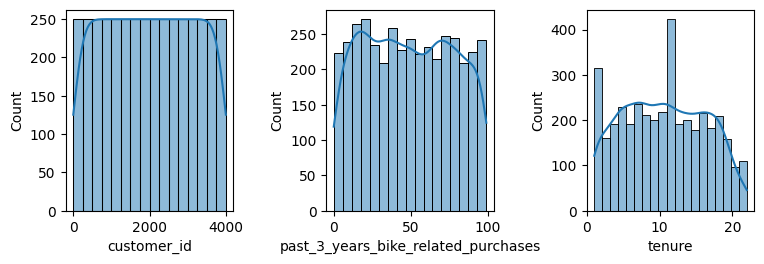

In [23]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.histplot(x=CustomerDemographic[i[1]], kde=True)

plt.tight_layout(pad=2)
plt.show()

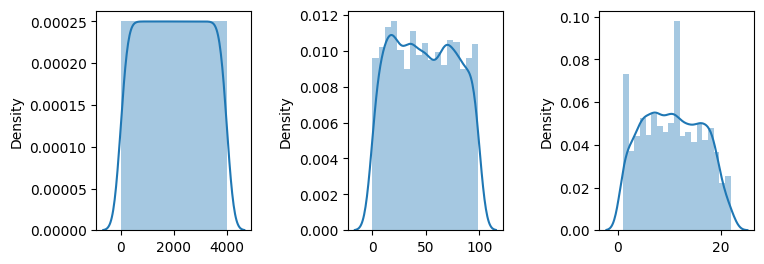

In [24]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.distplot(x=CustomerDemographic[i[1]])

plt.tight_layout(pad=2)
plt.show()

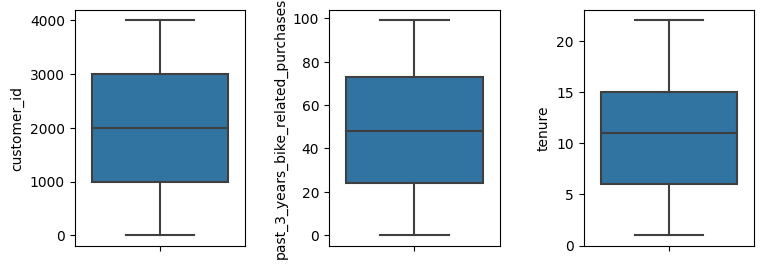

In [25]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.boxplot(y=CustomerDemographic[i[1]], orient='v')

plt.tight_layout(pad=2)
plt.show()

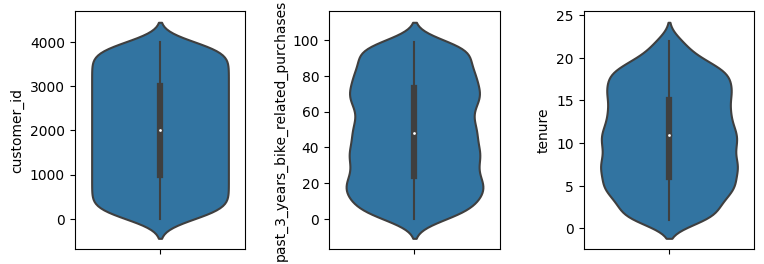

In [26]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.violinplot(y=CustomerDemographic[i[1]], orient='v')

plt.tight_layout(pad=2)
plt.show()

##### 1.7.2. Categorical Features

In [27]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
first_name,4000,3139,Max,5
last_name,3875,3725,Pristnor,3
gender,4000,6,Female,2037
DOB,3913,3448,1978-01-30 00:00:00,7
job_title,3494,195,Business Systems Development Analyst,45
job_industry_category,3344,9,Manufacturing,799
wealth_segment,4000,3,Mass Customer,2000
deceased_indicator,4000,2,N,3998
default,3698,90,100,113
owns_car,4000,2,Yes,2024


In [28]:
categorical_distribution(cat)

,Feature Name,Top most frequent class,Percentage (%)
0,first_name,Max,0.12
1,last_name,Pristnor,0.08
2,gender,Female,50.92
3,DOB,1978-01-30 00:00:00,0.18
4,job_title,Business Systems Development Analyst,1.29
5,job_industry_category,Manufacturing,23.89
6,wealth_segment,Mass Customer,50.00
7,deceased_indicator,N,99.95
8,default,100,3.06
9,owns_car,Yes,50.60


### 2. Data Cleaning

In [29]:
# Create copy of dataset
cd = CustomerDemographic.copy()

#### Fixing the Data Quality Issues

#### 2.1. Dropping Irrelavant Columns

In [30]:
# Drop column
cd.drop(columns=['default'], inplace=True)

In [31]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

✅ The dataset has been cleared of irrelevant columns.

#### 2.2. Handling Missing Values

In [32]:
cd.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

🔽 `first_name` and `last_name`
> The assumption is that the user either left the `last_name` blank or does not have one, therefore, to address this issue, I decided to replace the missing value for the `last_name` with the value from the `first_name` column.

In [33]:
cd['last_name'].fillna(cd['first_name'], inplace=True)
cd[['first_name', 'last_name']].head()

,first_name,last_name
0,Laraine,Medendorp
1,Eli,Bockman
2,Arlin,Dearle
3,Talbot,Talbot
4,Sheila-kathryn,Calton


🔽 `job_title` and `job_industry_category`
> There are over 500 missing values in both the `job_title` and `job_industry_category` columns. Considering the frequency of unique values, I decided to use forward fill (ffill) and backward fill (bfill) for each group. This allows missing values to be filled with available values from the same group, either in the previous or next rows.

In [34]:
cd[['job_title', 'job_industry_category']].head()

,job_title,job_industry_category
0,Executive Secretary,Health
1,Administrative Officer,Financial Services
2,Recruiting Manager,Property
3,NaN,IT
4,Senior Editor,NaN


In [35]:
cd['job_title'].fillna(cd.groupby('job_industry_category')['job_title'].ffill(), inplace=True)
cd['job_title'].fillna(cd.groupby('job_industry_category')['job_title'].bfill(), inplace=True)
cd['job_industry_category'].fillna(cd.groupby('job_title')['job_industry_category'].ffill(), inplace=True)
cd['job_industry_category'].fillna(cd.groupby('job_title')['job_industry_category'].bfill(), inplace=True)
cd[['job_title', 'job_industry_category']].head()

,job_title,job_industry_category
0,Executive Secretary,Health
1,Administrative Officer,Financial Services
2,Recruiting Manager,Property
3,Legal Assistant,IT
4,Senior Editor,Retail


In [36]:
cd.dropna(subset=['job_title', 'job_industry_category'], inplace=True)
cd[['job_title', 'job_industry_category']].isna().sum()

job_title                0
job_industry_category    0
dtype: int64

🔽 `DOB` or date of birth
> The number of missing values is greater than the mode, therefore I decided to drop  the missing value in this column.

In [37]:
cd.dropna(subset=['DOB'], inplace=True)

🔽 `tenure`

In [38]:
cd.dropna(subset=['tenure'], inplace=True)

In [39]:
cd.isna().sum().sum()

0

✅ The dataset has been cleared of missing values.

#### 2.3. Handling Data Types

🔽 `DOB`

In [40]:
# Convert DOB column to datetime format
cd['DOB'] = pd.to_datetime(cd['DOB'], errors='coerce')

# Check the minimum and maximum date of birth
print('first', cd['DOB'].min())
print('last', cd['DOB'].max())

first 1843-12-21 00:00:00
last 2002-03-11 00:00:00


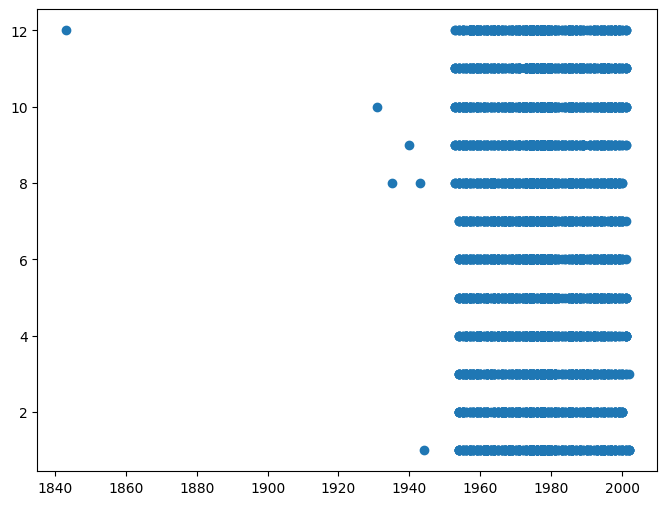

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(cd['DOB'].dt.year, cd['DOB'].dt.month)
plt.show()

In [42]:
cd[cd['DOB'] == '1843-12-21 00:00:00']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [43]:
cd['age'] = (dt.datetime.now() - cd['DOB']).dt.days // 365
cd['age'].describe()

count    3808.000000
mean       45.329044
std        12.821692
min        21.000000
25%        36.000000
50%        45.000000
75%        55.000000
max       179.000000
Name: age, dtype: float64

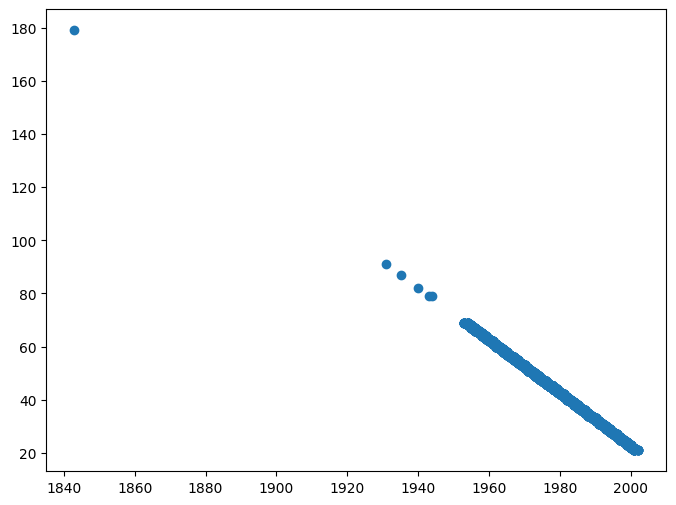

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(cd['DOB'].dt.year, cd['age'])
plt.show()

- The oldest customer (#34, Jephthah Bachmann) was born in 1843, which means his/her age is 179 years, indicating an error in the data.

🔽 `tenure`

In [45]:
# Convert the column to integer
cd['tenure'] = cd['tenure'].astype('int64')
cd['tenure'].value_counts()

tenure
7     225
5     222
11    215
16    211
10    211
18    208
8     202
14    198
12    196
9     194
13    187
4     187
6     184
17    177
15    174
1     163
3     155
19    154
2     145
20     93
22     55
21     52
Name: count, dtype: int64

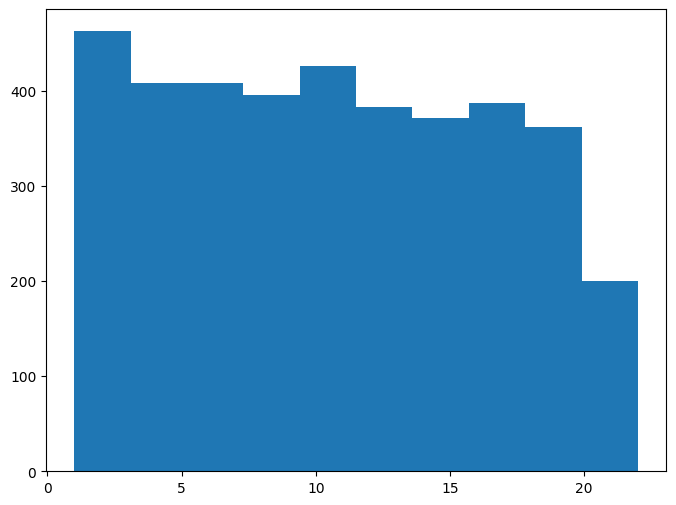

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(cd['tenure'][pd.notna(cd['tenure'])])
plt.show()

#### 2.4. Handling Incorrect Values

🔽 `gender`

In [47]:
cd['gender'].value_counts()

gender
Female    1976
Male      1828
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

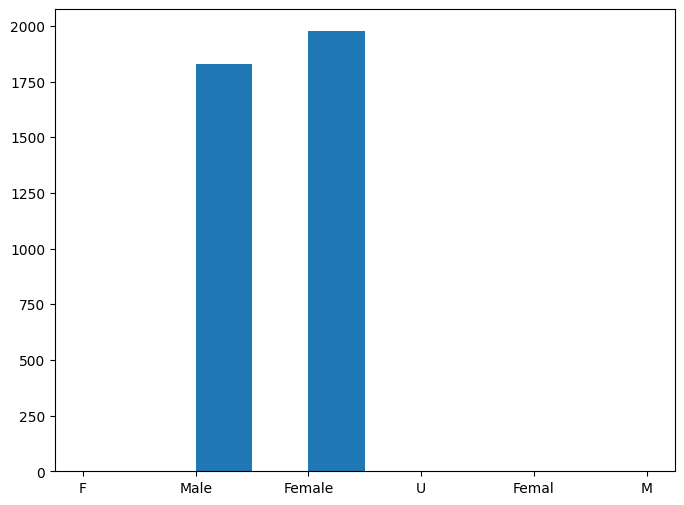

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(cd['gender'][pd.notna(cd['gender'])])
plt.show()

- The values in the `gender` column are inconsistent and require replacement with their respective and correct values.

In [49]:
# Renaming the categories
cd['gender'] = cd['gender'].replace({'F'     : 'Female',
                                     'Femal' : 'Female',
                                     'M'     : 'Male',
                                     'U'     : 'Unspecified'})
cd['gender'].value_counts()

gender
Female         1978
Male           1829
Unspecified       1
Name: count, dtype: int64

- The `gender` "Unspecified" has only one value, thus it will be dropped.

In [50]:
cd.drop(cd[cd['gender'] == 'Unspecified'].index, inplace=True)
cd['gender'].value_counts()

gender
Female    1978
Male      1829
Name: count, dtype: int64

🔽 `deceased_indicator`

In [51]:
cd['deceased_indicator'].value_counts()

deceased_indicator
N    3805
Y       2
Name: count, dtype: int64

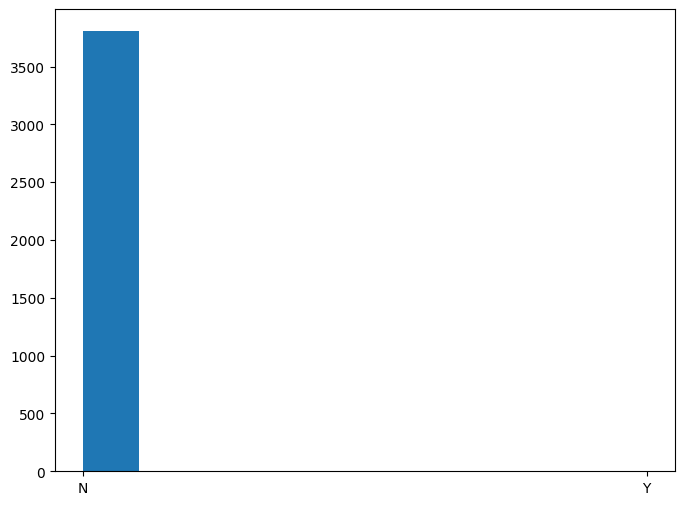

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(cd['deceased_indicator'][pd.notna(cd['deceased_indicator'])])
plt.show()

In [53]:
cd['deceased_indicator'].replace(['Y', 'N'],
                                 ['Yes', 'No'],
                                 inplace=True)

In [54]:
# Remove Yes deceased_indicator
cd = cd[cd['deceased_indicator'] != 'Yes']

In [55]:
# Drop column
cd.drop(columns='deceased_indicator', inplace=True)

In [56]:
# Data types of the columns
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3805 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3805 non-null   int64         
 1   first_name                           3805 non-null   object        
 2   last_name                            3805 non-null   object        
 3   gender                               3805 non-null   object        
 4   past_3_years_bike_related_purchases  3805 non-null   int64         
 5   DOB                                  3805 non-null   datetime64[ns]
 6   job_title                            3805 non-null   object        
 7   job_industry_category                3805 non-null   object        
 8   wealth_segment                       3805 non-null   object        
 9   owns_car                             3805 non-null   object        
 10  tenure           

✅ The value and data type have been verified as accurate.

### 3. Export the Clean Dataset

In [57]:
cd.to_csv(r'clean_CustomerDemographic.csv', index=False)

## B. Customer Address

### 1. Exploratory Data Analysis

#### 1.1. Dimensions of the DataFrame

In [58]:
CustomerAddress.shape

(3999, 6)

In [59]:
print('Total rows: {}'.format(CustomerAddress.shape[0]))
print('Total cols: {}'.format(CustomerAddress.shape[1]))

Total rows: 3999
Total cols: 6


#### 1.2. Data Types of the Columns

In [60]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


#### 1.3. Display a Few Rows

In [61]:
# Check the sample
CustomerAddress.sample(n=5, random_state=50)

,customer_id,address,postcode,state,country,property_valuation
3218,3223,93723 Old Gate Hill,2021,NSW,Australia,9
2007,2012,33 Del Mar Junction,2264,NSW,Australia,8
3638,3643,686 Scoville Drive,3012,VIC,Australia,5
2165,2170,5 Muir Circle,2030,NSW,Australia,12
2300,2305,84 Main Lane,3149,VIC,Australia,10


🔎 Observation
- The `postcode` column is categorical data, rather than numerical data, so it should be converted to string data type.

#### 1.4. Detect Duplicated Data

In [62]:
# Detect duplicated value
CustomerAddress.duplicated().sum()

0

🔎 Observation
- There are no duplicate values.

#### 1.5. Detect Missing Data

In [63]:
# Summarize missing value
CustomerAddress.isna().sum().sum()

0

🔎 Observation
- There are no missing values.

#### 1.6. Number of Unique Classes

In [64]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [65]:
unique_values(CustomerAddress)

,Feature Name,Unique Classes
0,customer_id,"[1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1..."
1,address,"[060 Morning Avenue, 6 Meadow Vale Court, 0 Ho..."
2,postcode,"[2016, 2153, 4211, 2448, 3216, 2210, 2650, 202..."
3,state,"[New South Wales, QLD, VIC, NSW, Victoria]"
4,country,[Australia]
5,property_valuation,"[10, 9, 4, 12, 8, 6, 7, 3, 5, 11, 1, 2]"


🔎 Observation
- `New South Wales` and `Victoria` will be converted to Postal abbreviation.

#### 1.7. Descriptive Statistics

In [66]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [67]:
# Define features
num = CustomerAddress.select_dtypes(exclude = ['object'])
cat = CustomerAddress.select_dtypes(include = ['object'])

In [68]:
num.shape[1]

3

In [69]:
cat.shape[1]

3

##### 1.7.1. Numerical Features

In [70]:
# Summary statistics for numerical features
num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


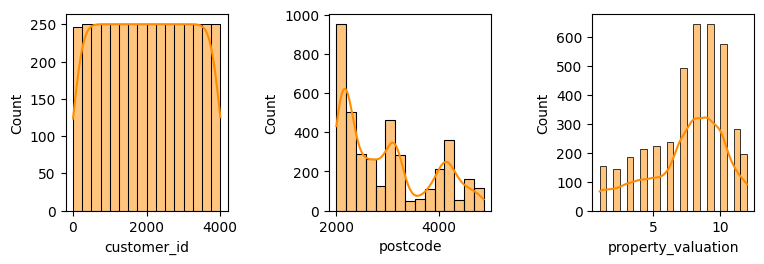

In [71]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.histplot(x=CustomerAddress[i[1]], kde=True, color='darkorange')

plt.tight_layout(pad=2)
plt.show()

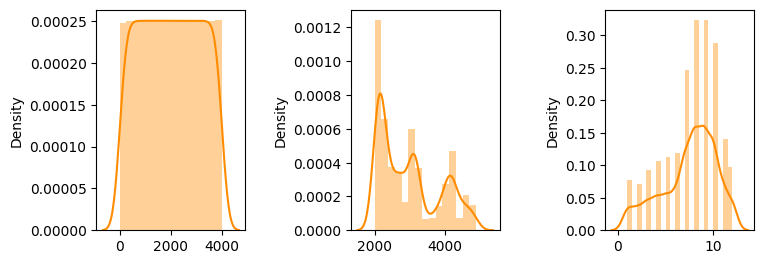

In [72]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.distplot(x=CustomerAddress[i[1]], color='darkorange')

plt.tight_layout(pad=2)
plt.show()

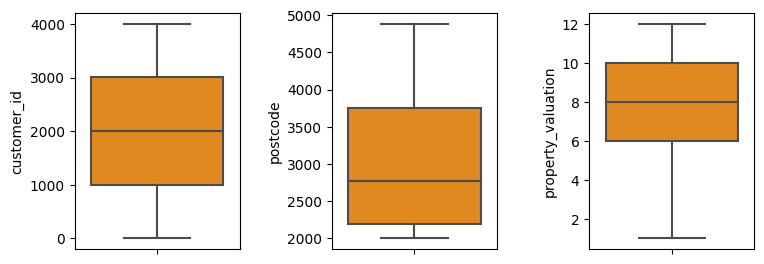

In [73]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.boxplot(y=CustomerAddress[i[1]], orient='v', color='darkorange')

plt.tight_layout(pad=2)
plt.show()

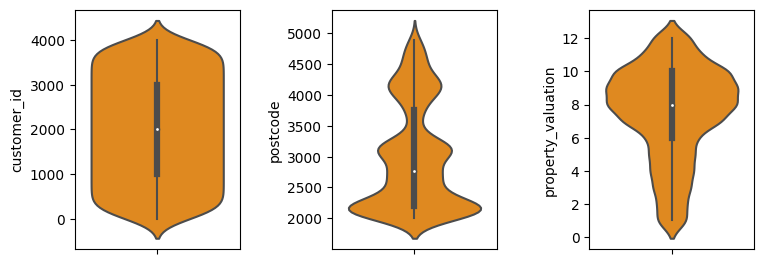

In [74]:
plt.figure(figsize=(8, 3))
for i in enumerate(num):
    plt.subplot(1, 3, i[0] + 1)
    sns.violinplot(y=CustomerAddress[i[1]], orient='v', color='darkorange')

plt.tight_layout(pad=2)
plt.show()

##### 1.7.2. Categorical Features

In [75]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
address,3999,3996,3 Mariners Cove Terrace,2
state,3999,5,NSW,2054
country,3999,1,Australia,3999


In [76]:
categorical_distribution(cat)

,Feature Name,Top most frequent class,Percentage (%)
0,address,3 Mariners Cove Terrace,0.05
1,state,NSW,51.36
2,country,Australia,100.00


### 2. Data Cleaning

In [77]:
# Create copy of dataset
ca = CustomerAddress.copy()

#### Fixing the Data Quality Issues

#### 2.1. Handling Data Types

🔽 `postcode`

In [78]:
# Convert the column to string
ca['postcode'] = ca['postcode'].astype(str)

#### 2.2. Handling Incorrect Values

🔽 `state`
> There are values that are inconsistent, therefore, I have replaced 'New South Wales' with 'NSW' and 'Victoria' with 'VIC'.

In [79]:
ca['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

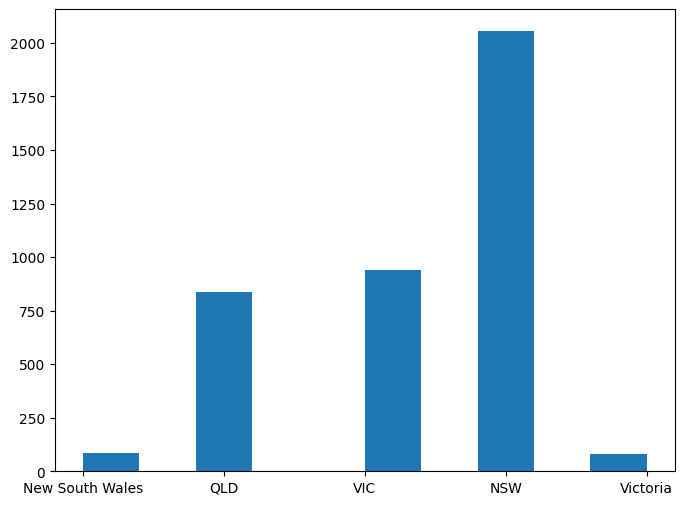

In [80]:
plt.figure(figsize=(8, 6))
plt.hist(ca['state'][pd.notna(ca['state'])])
plt.show()

In [81]:
# Renaming the categories
ca['state'] = ca['state'].replace({'New South Wales' : 'NSW',
                                   'Victoria'        : 'VIC'})
ca['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [82]:
# Data types of the columns
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 187.6+ KB


✅ The value and data type have been correct.

### 3. Export the Clean Dataset

In [83]:
ca.to_csv(r'clean_CustomerAddress.csv', index=False)

## C. Transactions

### 1. Exploratory Data Analysis

#### 1.1. Dimensions of the DataFrame

In [84]:
Transactions.shape

(20000, 13)

In [85]:
print('Total rows: {}'.format(Transactions.shape[0]))
print('Total cols: {}'.format(Transactions.shape[1]))

Total rows: 20000
Total cols: 13


#### 1.2. Data Types of the Columns

In [86]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### 1.3. Display a Few Rows

In [87]:
# Check the sample
Transactions.sample(n=5, random_state=50)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7808,7809,80,2205,2017-09-21,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,35455.0
4702,4703,0,1944,2017-04-24,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
8693,8694,46,3116,2017-10-04,NaN,Approved,Solex,Standard,low,medium,1289.85,74.51,39427.0
9085,9086,69,1356,2017-12-08,1.0,Approved,Norco Bicycles,Road,medium,large,1240.31,795.10,40553.0
16689,16690,78,1378,2017-04-26,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,38193.0


🔎 Observation
- The `online_order` column should have an integer data type.
- The `order_status` column should be converted to boolean data type.
- The value 'Cancelled' in the `order_status` column indicates that the customer has canceled their order, and therefore they are not considered as completed orders.
- The `product_first_sold_date` column should have a datetime data type.

#### 1.4. Detect Duplicated Data

In [88]:
# Detect duplicated value
Transactions.duplicated().sum()

0

🔎 Observation
- There are no duplicate values, so the data is distinct/unique.

#### 1.5. Detect Missing Data

In [89]:
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [90]:
missing_values(Transactions)

,Feature Name,Total,Percentage (%)
0,online_order,360,1.80
1,brand,197,0.98
2,product_line,197,0.98
3,product_class,197,0.98
4,product_size,197,0.98
5,standard_cost,197,0.98
6,product_first_sold_date,197,0.98


In [91]:
Transactions.isna().sum().sum()

1542

🔎 Observation
- There exist 7 columns with null or missing values that may either be dropped or handled depending on the objective of our analysis.
- Missing values in the `online_order` column can be filled with the mode value.
- Missing values in the `brand`, `product_line`, `product_class`, `product_size`, and `standard_cost` columns can be filled with certain values.
- Columns with missing values less than or equal to 5% can be dropped.

#### 1.6. Number of Unique Classes

In [92]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [93]:
unique_values(Transactions)

,Feature Name,Unique Classes
0,transaction_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,product_id,"[2, 3, 37, 88, 78, 25, 22, 15, 67, 12, 5, 61, ..."
2,customer_id,"[2950, 3120, 402, 3135, 787, 2339, 1542, 2459,..."
3,transaction_date,"[2017-02-25 00:00:00, 2017-05-21 00:00:00, 201..."
4,online_order,"[0.0, 1.0, nan]"
5,order_status,"[Approved, Cancelled]"
6,brand,"[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc..."
7,product_line,"[Standard, Road, Mountain, Touring, nan]"
8,product_class,"[medium, low, high, nan]"
9,product_size,"[medium, large, small, nan]"


#### 1.7. Descriptive Statistics

In [94]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [95]:
# Define features
num = Transactions.select_dtypes(exclude = ['object', 'datetime64[ns]'])
cat = Transactions.select_dtypes(include = ['object'])

In [96]:
num.shape[1]

7

In [97]:
cat.shape[1]

5

##### 1.7.1. Numerical Features

In [98]:
# Summary statistics for numerical features
num.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
customer_id,20000.0,1738.246050,1011.951046,1.00,857.75,1736.00,2613.00,5034.00
online_order,19640.0,0.500458,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.10,1759.85
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.00,35667.00,38216.00,40672.00,42710.00


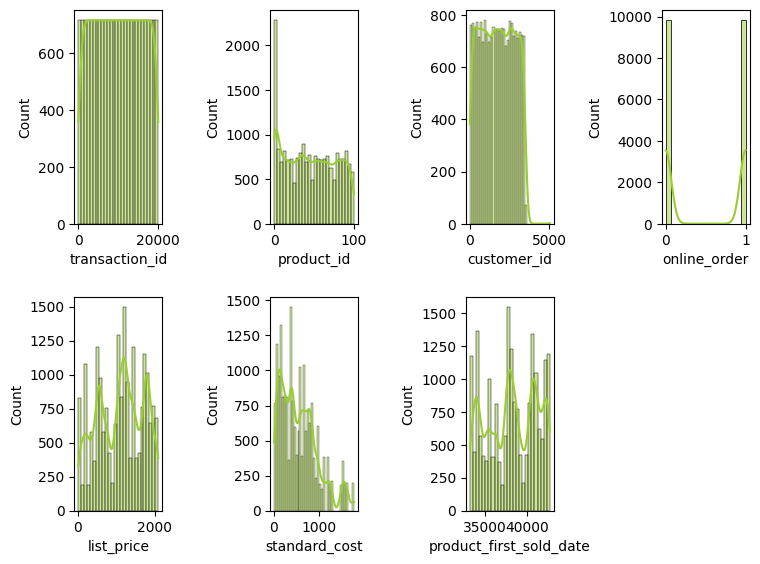

In [99]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 4, i[0] + 1)
    sns.histplot(x=Transactions[i[1]], kde=True, color='yellowgreen')

plt.tight_layout(pad=2)
plt.show()

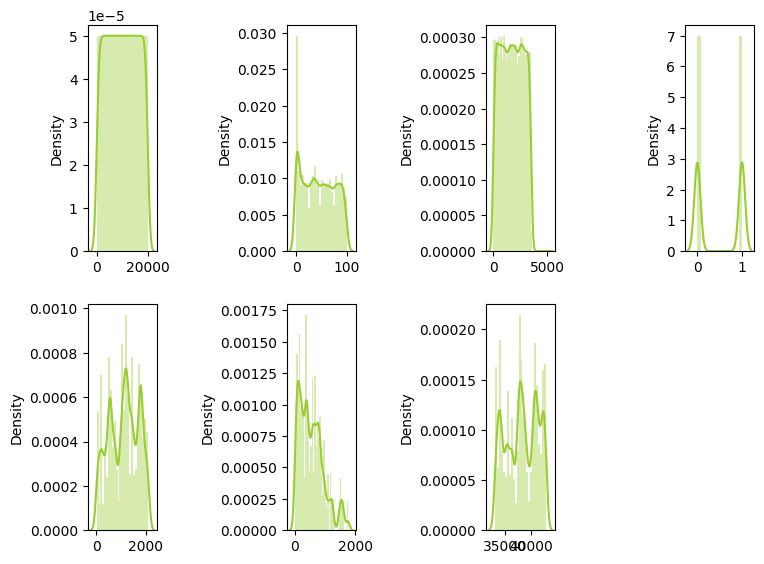

In [100]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 4, i[0] + 1)
    sns.distplot(x=Transactions[i[1]], color='yellowgreen')

plt.tight_layout(pad=2)
plt.show()

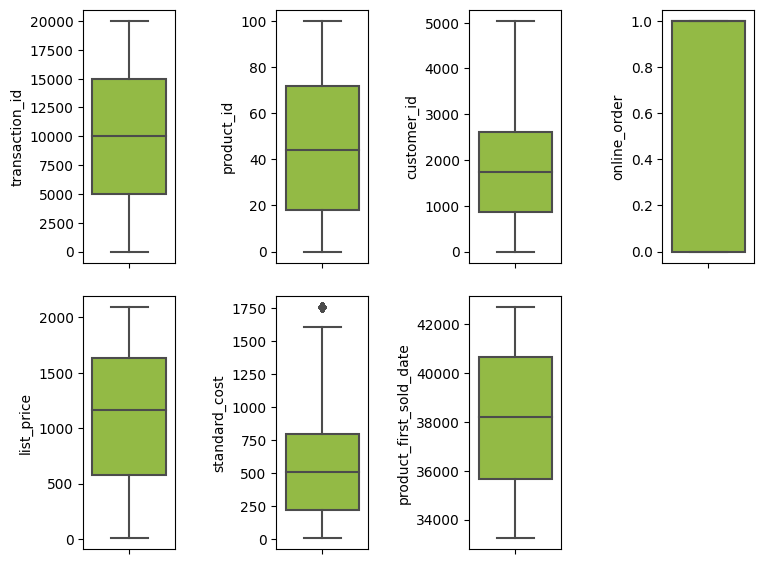

In [101]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 4, i[0] + 1)
    sns.boxplot(y=Transactions[i[1]], orient='v', color='yellowgreen')

plt.tight_layout(pad=2)
plt.show()

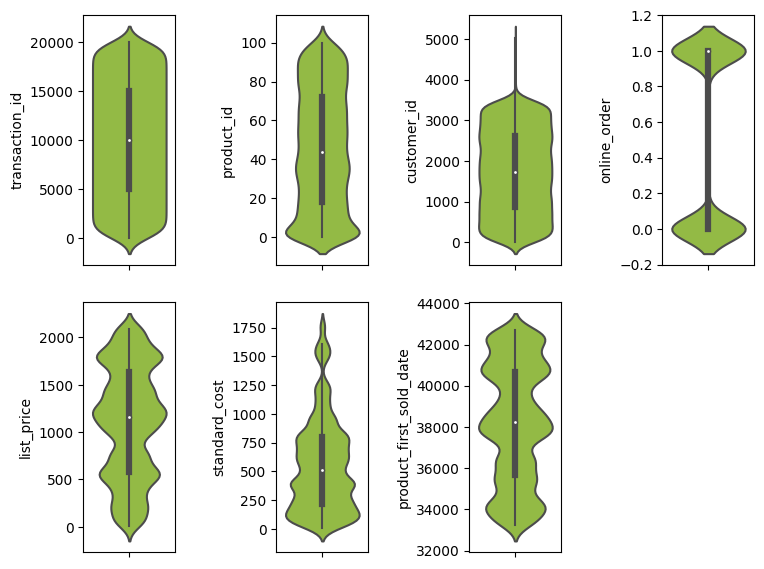

In [102]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 4, i[0] + 1)
    sns.violinplot(y=Transactions[i[1]], orient='v', color='yellowgreen')

plt.tight_layout(pad=2)
plt.show()

##### 1.7.2. Categorical Features

In [103]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
order_status,20000,2,Approved,19821
brand,19803,6,Solex,4253
product_line,19803,4,Standard,14176
product_class,19803,3,medium,13826
product_size,19803,3,medium,12990


In [104]:
categorical_distribution(cat)

,Feature Name,Top most frequent class,Percentage (%)
0,order_status,Approved,99.10
1,brand,Solex,21.48
2,product_line,Standard,71.59
3,product_class,medium,69.82
4,product_size,medium,65.60


### 2. Data Cleaning

In [105]:
# Create copy of dataset
tx = Transactions.copy()

#### Fixing the Data Quality Issues

#### 2.1. Handling Missing Values

In [106]:
tx.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [107]:
tx.dropna(inplace=True)

In [108]:
tx.isna().sum().sum()

0

✅ The dataset has been cleared of missing values.

#### 2.2. Handling Data Types

🔽 `online_order`

In [109]:
# Convert the column to integers
tx['online_order'] = tx['online_order'].astype('int64')
tx['online_order'].describe()

count    19445.000000
mean         0.500849
std          0.500012
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: online_order, dtype: float64

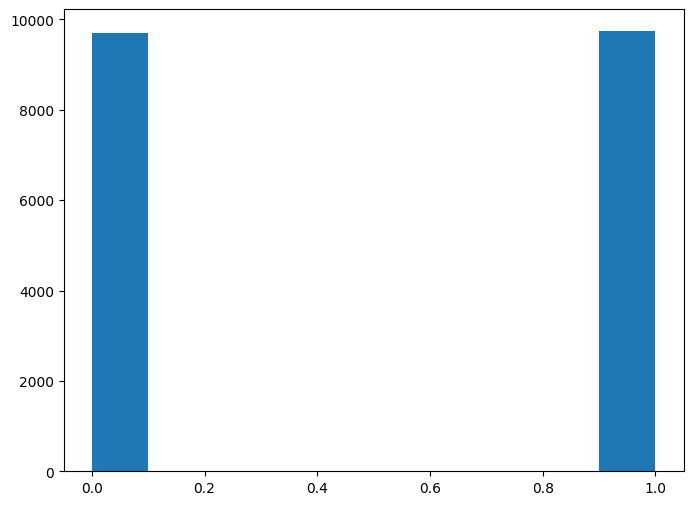

In [110]:
plt.figure(figsize=(8, 6))
plt.hist(tx['online_order'][pd.notna(tx['online_order'])])
plt.show()

🔽 `product_first_sold_date`

In [111]:
# Convert product_first_sold_date column to datetime format
tx['product_first_sold_date'] = pd.to_datetime(tx['product_first_sold_date'], unit='D', origin=pd.Timestamp('1900-01-01'))
tx['product_first_sold_date'].describe()

count                            19445
mean     2004-08-04 18:12:27.585497472
min                1991-01-23 00:00:00
25%                1997-08-27 00:00:00
50%                2004-08-19 00:00:00
75%                2011-05-11 00:00:00
max                2016-12-08 00:00:00
Name: product_first_sold_date, dtype: object

In [112]:
recent_purchases = tx['transaction_date'].max()
tx['last_purchases'] = recent_purchases - tx['transaction_date']
tx['last_purchases'] /= np.timedelta64(1, 'D')
tx['last_purchases'] = tx['last_purchases'].astype('int64')
tx['last_purchases'].describe()

count    19445.000000
mean       181.318539
std        105.344154
min          0.000000
25%         89.000000
50%        180.000000
75%        273.000000
max        363.000000
Name: last_purchases, dtype: float64

In [113]:
tx['profit'] = tx['list_price'] - tx['standard_cost']
tx['profit'].describe()

count    19445.000000
mean       551.751933
std        493.211843
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

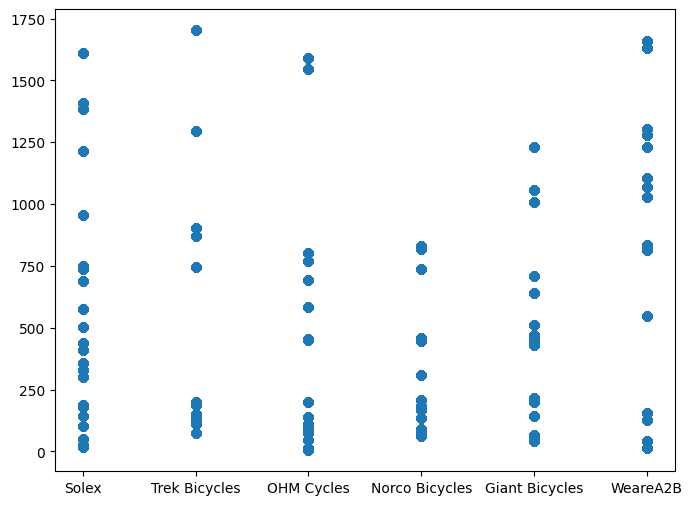

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(tx['brand'][pd.notna(tx['brand'])], tx['profit'][pd.notna(tx['brand'])])
plt.show()

#### 2.3. Handling Incorrect Values

🔽 `order_status`

In [115]:
tx['order_status'].value_counts()

order_status
Approved     19273
Cancelled      172
Name: count, dtype: int64

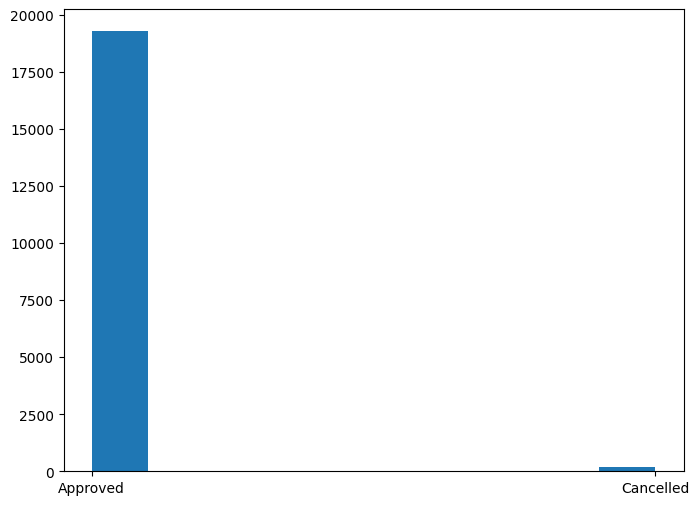

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(tx['order_status'][pd.notna(tx['order_status'])])
plt.show()

In [117]:
# Remove Cancelled order_status
tx = tx[tx['order_status'] != 'Cancelled']

In [118]:
# Drop column
tx.drop(columns='order_status', inplace=True)

- If an order has the status "Cancelled" in the `order_status` column, it means that the transaction was canceled and the company did not generate any revenue from it. To get only the data of successful transactions, I decided to remove the records with the "Cancelled" value and drop the entire `order_status` column.

In [119]:
# Data types of the columns
tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19273 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19273 non-null  int64         
 1   product_id               19273 non-null  int64         
 2   customer_id              19273 non-null  int64         
 3   transaction_date         19273 non-null  datetime64[ns]
 4   online_order             19273 non-null  int64         
 5   brand                    19273 non-null  object        
 6   product_line             19273 non-null  object        
 7   product_class            19273 non-null  object        
 8   product_size             19273 non-null  object        
 9   list_price               19273 non-null  float64       
 10  standard_cost            19273 non-null  float64       
 11  product_first_sold_date  19273 non-null  datetime64[ns]
 12  last_purchases           19273 non-nu

✅ The value and data type have been verified as accurate.

### 3. Export the Clean Dataset

In [184]:
tx.to_csv(r'clean_Transactions.csv', index=False)

#### 3.1. Getting Transactions Data in the Past 3 Months

In [121]:
# Sort by latest transaction_date
tx = tx.sort_values(by='transaction_date', ascending=False)

# Check the minimum and maximum transaction_date
print('first', tx['transaction_date'].min())
print('last', tx['transaction_date'].max())

first 2017-01-01 00:00:00
last 2017-12-30 00:00:00


In [122]:
# Filter data in the past 3 months
latest_tx = tx[(tx['transaction_date'] >= '2017-10-01') &
               (tx['transaction_date'] <= '2017-12-30')]

In [123]:
latest_tx['transaction_date'].describe()

count                             4893
mean     2017-11-14 14:11:24.242795776
min                2017-10-01 00:00:00
25%                2017-10-23 00:00:00
50%                2017-11-15 00:00:00
75%                2017-12-08 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [185]:
latest_tx.to_csv(r'latest_3months_Transactions.csv', index=False)

## D. New Customer List

### 1. Exploratory Data Analysis

#### 1.1. Dimensions of the DataFrame

In [125]:
NewCustomerList.shape

(1000, 23)

In [126]:
print('Total rows: {}'.format(NewCustomerList.shape[0]))
print('Total cols: {}'.format(NewCustomerList.shape[1]))

Total rows: 1000
Total cols: 23


#### 1.2. Data Types of the Columns

In [127]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

#### 1.3. Display a Few Rows

In [128]:
# Check the sample
NewCustomerList.sample(n=5, random_state=50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
316,Audry,Fann,Female,3,1957-10-17,Pharmacist,Health,Mass Customer,N,Yes,15,19 Debs Parkway,3029,VIC,Australia,6,0.66,0.8250,0.825000,0.701250,312,312,1.0200
459,Gregorius,Leal,Male,7,1951-04-29,NaN,Retail,Affluent Customer,N,Yes,21,66 Merry Court,2033,NSW,Australia,12,0.88,1.1000,1.375000,1.375000,455,455,0.8925
854,Maurine,Clee,Female,45,1980-09-13,Automation Specialist II,Property,High Net Worth,N,Yes,5,6 Maple Plaza,2042,NSW,Australia,10,0.81,1.0125,1.265625,1.265625,854,854,0.5610
11,Wheeler,Winward,Male,48,1999-08-30,Environmental Specialist,Manufacturing,Mass Customer,N,No,10,3 Golden Leaf Point,3216,VIC,Australia,8,0.55,0.5500,0.550000,0.467500,12,12,1.6250
978,Artemis,Swanson,Male,77,1977-02-12,Web Designer II,Argiculture,Mass Customer,N,Yes,13,5 Melvin Park,3810,VIC,Australia,5,0.84,1.0500,1.050000,0.892500,979,979,0.4165


🔎 Observation
- The `DOB` column should have a datetime data type.
- The `owns_car` column should be converted to boolean data type.
- The `postcode` column is categorical data, rather than numerical data, so it should be converted to string data type.
- We can drop the unnamed columns (i.e., `Unnamed: 16` to `Unnamed: 20`) as they are not useful.

#### 1.4. Detect Duplicated Data

In [129]:
# Detect duplicated value
NewCustomerList.duplicated().sum()

0

🔎 Observation
- There are no duplicate values.

#### 1.5. Detect Missing Data

In [130]:
NewCustomerList.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [131]:
missing_values(NewCustomerList)

,Feature Name,Total,Percentage (%)
0,last_name,29,2.9
1,DOB,17,1.7
2,job_title,106,10.6
3,job_industry_category,165,16.5


In [132]:
NewCustomerList.isna().sum().sum()

317

🔎 Observation
- There are missing values in the `last_name`, `DOB`, `job_title`, and `job_industry_category` columns, so they can be dropped or handled.
- Missing values in the `last_name` column can be filled with values in the `first_name` column.
- Missing values in the `job_title` and `job_industry_category` columns can be filled with certain values.
- Columns with missing values less than or equal to 5% can be dropped.

#### 1.6. Number of Unique Classes

In [133]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             183
Unnamed: 19                             321
Unnamed: 20                             324
Rank                                    324
Value                           

In [134]:
unique_values(NewCustomerList)

,Feature Name,Unique Classes
0,first_name,"[Chickie, Morly, Ardelis, Lucine, Melinda, Dru..."
1,last_name,"[Brister, Genery, Forrester, Stutt, Hadlee, Br..."
2,gender,"[Male, Female, U]"
3,past_3_years_bike_related_purchases,"[86, 69, 10, 64, 34, 39, 23, 74, 50, 72, 94, 4..."
4,DOB,"[1957-07-12, 1970-03-22, 1974-08-28 00:00:00, ..."
5,job_title,"[General Manager, Structural Engineer, Senior ..."
6,job_industry_category,"[Manufacturing, Property, Financial Services, ..."
7,wealth_segment,"[Mass Customer, Affluent Customer, High Net Wo..."
8,deceased_indicator,[N]
9,owns_car,"[Yes, No]"


🔎 Observation
- The value 'N' in the `deceased_indicator` column indicates that the customer is not deceased, and therefore they are considered active customers.

#### 1.7. Descriptive Statistics

In [135]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [136]:
# Define features
num = NewCustomerList.select_dtypes(exclude = ['object'])
cat = NewCustomerList.select_dtypes(include = ['object'])

In [137]:
num.shape[1]

11

In [138]:
cat.shape[1]

12

##### 1.7.1. Numerical Features

In [139]:
# Summary statistics for numerical features
num.describe().T

,count,mean,std,min,25%,50%,75%,max
past_3_years_bike_related_purchases,1000.0,49.836000,27.796686,0.00,26.750000,51.000000,72.000000,99.00000
tenure,1000.0,11.388000,5.037145,0.00,7.000000,11.000000,15.000000,22.00000
postcode,1000.0,3019.227000,848.895767,2000.00,2209.000000,2800.000000,3845.500000,4879.00000
property_valuation,1000.0,7.397000,2.758804,1.00,6.000000,8.000000,9.000000,12.00000
Unnamed: 16,1000.0,0.747340,0.205082,0.40,0.570000,0.750000,0.920000,1.10000
Unnamed: 17,1000.0,0.839005,0.248858,0.40,0.637500,0.820000,1.031875,1.37500
Unnamed: 18,1000.0,0.942673,0.294832,0.40,0.712500,0.912500,1.142969,1.71875
Unnamed: 19,1000.0,0.870514,0.280891,0.34,0.658750,0.842625,1.062500,1.71875
Unnamed: 20,1000.0,498.819000,288.810997,1.00,250.000000,500.000000,750.250000,1000.00000
Rank,1000.0,498.819000,288.810997,1.00,250.000000,500.000000,750.250000,1000.00000


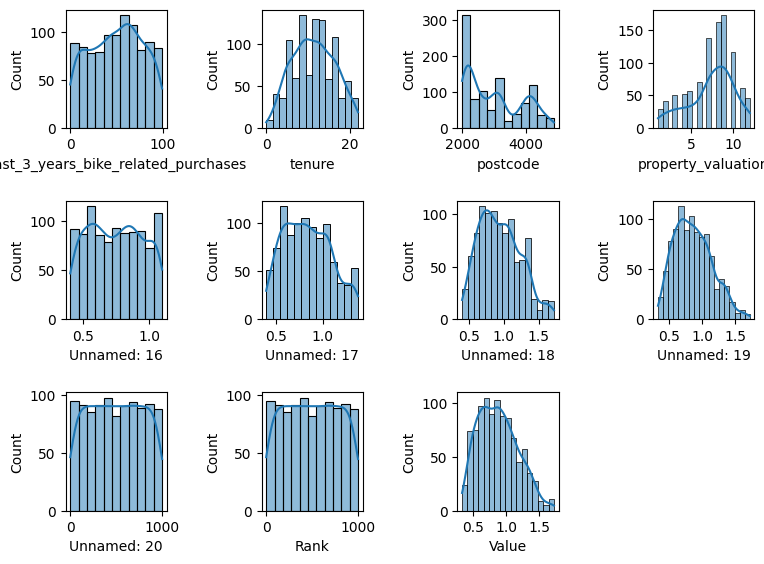

In [140]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(3, 4, i[0] + 1)
    sns.histplot(x=NewCustomerList[i[1]], kde=True)

plt.tight_layout(pad=2)
plt.show()

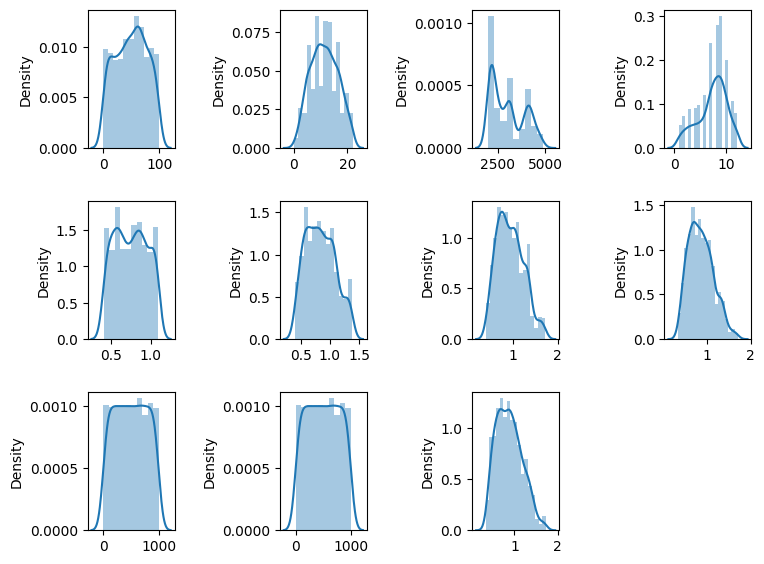

In [141]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(3, 4, i[0] + 1)
    sns.distplot(x=NewCustomerList[i[1]])

plt.tight_layout(pad=2)
plt.show()

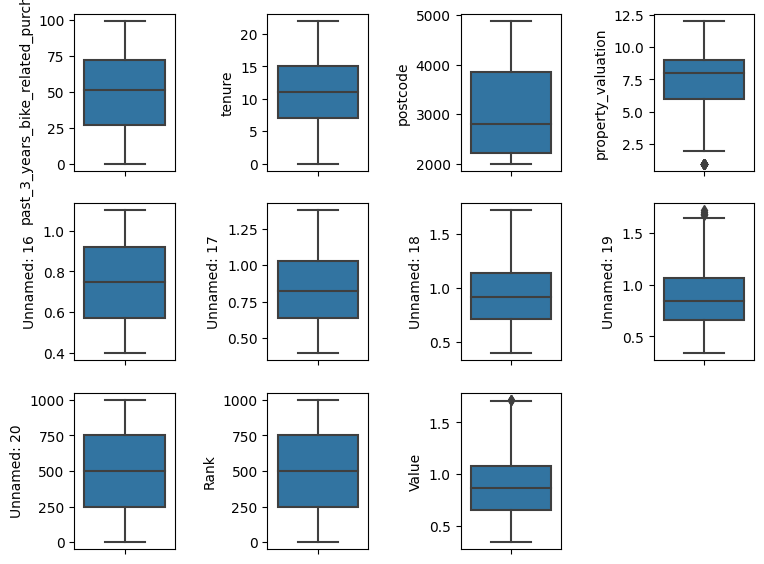

In [142]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(3, 4, i[0] + 1)
    sns.boxplot(y=NewCustomerList[i[1]], orient='v')

plt.tight_layout(pad=2)
plt.show()

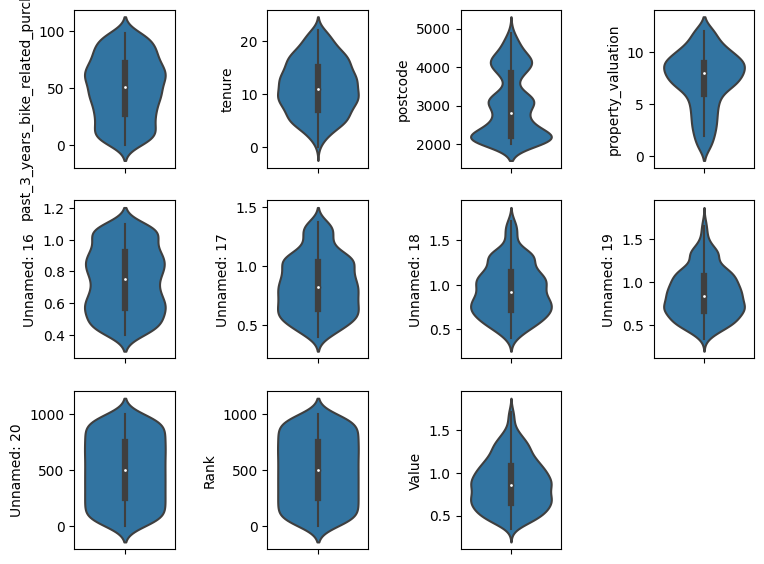

In [143]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(3, 4, i[0] + 1)
    sns.violinplot(y=NewCustomerList[i[1]], orient='v')

plt.tight_layout(pad=2)
plt.show()

##### 1.7.2. Categorical Features

In [144]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
first_name,1000,940,Rozamond,3
last_name,971,961,Sissel,2
gender,1000,3,Female,513
DOB,983,961,1965-07-03,2
job_title,894,184,Associate Professor,15
job_industry_category,835,9,Financial Services,203
wealth_segment,1000,3,Mass Customer,508
deceased_indicator,1000,1,N,1000
owns_car,1000,2,No,507
address,1000,1000,45 Shopko Center,1


In [145]:
categorical_distribution(cat)

,Feature Name,Top most frequent class,Percentage (%)
0,first_name,Rozamond,0.30
1,last_name,Sissel,0.21
2,gender,Female,51.30
3,DOB,1965-07-03,0.20
4,job_title,Associate Professor,1.68
5,job_industry_category,Financial Services,24.31
6,wealth_segment,Mass Customer,50.80
7,deceased_indicator,N,100.00
8,owns_car,No,50.70
9,address,45 Shopko Center,0.10


### 2. Data Cleaning

In [146]:
# Create copy of dataset
nc = NewCustomerList.copy()

#### Fixing the Data Quality Issues

#### 2.1. Dropping Irrelavant Columns

In [147]:
# Drop the Unnamed columns
nc.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [148]:
# Drop deceased_indicator column
nc.drop(columns=['deceased_indicator'], inplace=True)

In [149]:
nc.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank',
       'Value'],
      dtype='object')

✅ The dataset has been cleared of irrelevant columns.

#### 2.2. Handling Missing Values

In [150]:
nc.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

🔽 `first_name` and `last_name`
> The assumption is that the user either left the `last_name` blank or does not have one, therefore, to address this issue, I decided to replace the missing value for the `last_name` with the value from the `first_name` column.

In [151]:
nc['last_name'].fillna(nc['first_name'], inplace=True)
nc[['first_name', 'last_name']].tail()

,first_name,last_name
995,Ferdinand,Romanetti
996,Burk,Wortley
997,Melloney,Temby
998,Dickie,Cubbini
999,Sylas,Duffill


🔽 `job_title` and `job_industry_category`
> There are over 100 missing values in both the `job_title` and `job_industry_category` columns. Considering the frequency of unique values, I decided to use forward fill (ffill) and backward fill (bfill) for each group. This allows missing values to be filled with available values from the same group, either in the previous or next rows.

In [152]:
nc[['job_title', 'job_industry_category']].tail()

,job_title,job_industry_category
995,Paralegal,Financial Services
996,Senior Sales Associate,Health
997,Budget/Accounting Analyst IV,Financial Services
998,Financial Advisor,Financial Services
999,Staff Accountant IV,Property


In [153]:
nc['job_title'].fillna(nc.groupby('job_industry_category')['job_title'].ffill(), inplace=True)
nc['job_title'].fillna(nc.groupby('job_industry_category')['job_title'].bfill(), inplace=True)
nc['job_industry_category'].fillna(nc.groupby('job_title')['job_industry_category'].ffill(), inplace=True)
nc['job_industry_category'].fillna(nc.groupby('job_title')['job_industry_category'].bfill(), inplace=True)
nc[['job_title', 'job_industry_category']].tail()

,job_title,job_industry_category
995,Paralegal,Financial Services
996,Senior Sales Associate,Health
997,Budget/Accounting Analyst IV,Financial Services
998,Financial Advisor,Financial Services
999,Staff Accountant IV,Property


In [154]:
nc.dropna(subset=['job_title', 'job_industry_category'], inplace=True)
nc[['job_title', 'job_industry_category']].isna().sum()

job_title                0
job_industry_category    0
dtype: int64

🔽 `gender`

In [155]:
nc['gender'].value_counts()

gender
Female    497
Male      458
U          17
Name: count, dtype: int64

In [156]:
nc[nc['gender'] == 'U'].reset_index()

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
1,226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
2,324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
3,358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
4,360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
5,374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
6,434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
7,439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
8,574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
9,598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


- There are 17 rows where the gender is not specified.
- All customers with unspecified gender have none date of birth (DOB) data.

In [157]:
nc['gender'] = nc['gender'].replace('U', 'Unspecified')
nc['gender'].value_counts()

gender
Female         497
Male           458
Unspecified     17
Name: count, dtype: int64

🔽 `DOB`

In [158]:
nc.dropna(subset=['DOB'], inplace=True)

In [159]:
nc.isna().sum().sum()

0

✅ The dataset has been cleared of missing values.

#### 2.3. Handling Data Types

🔽 `DOB`

In [160]:
# Convert DOB column to datetime format
nc['DOB'] = pd.to_datetime(nc['DOB'], errors='coerce')

# Check the minimum and maximum date of birth
print('first', nc['DOB'].min())
print('last', nc['DOB'].max())

first 1938-06-08 00:00:00
last 2002-02-27 00:00:00


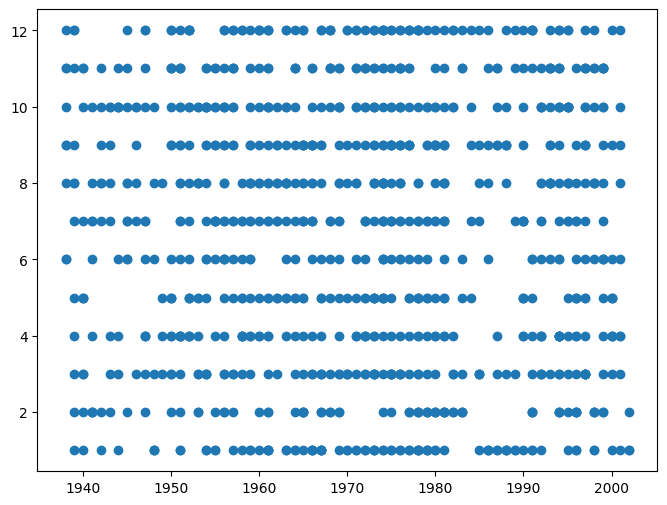

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(nc['DOB'].dt.year, nc['DOB'].dt.month)
plt.show()

- The youngest customer was born in 2002, while the oldest was born in 1938.

In [162]:
nc['age'] = (dt.datetime.now() - nc['DOB']).dt.days // 365
nc['age'].describe()

count    955.000000
mean      51.369634
std       17.025278
min       21.000000
25%       39.000000
50%       51.000000
75%       65.000000
max       84.000000
Name: age, dtype: float64

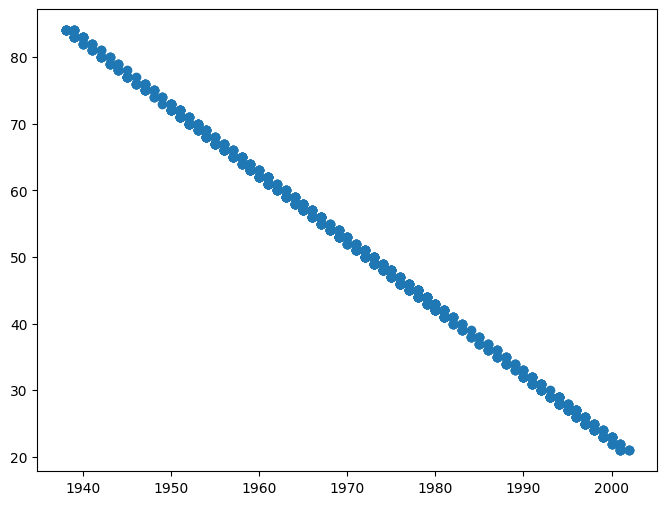

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(nc['DOB'].dt.year, nc['age'])
plt.show()

🔽 `postcode`

In [164]:
# Convert the column to string
nc['postcode'] = nc['postcode'].astype(str)

In [165]:
# Data types of the columns
nc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           955 non-null    object        
 1   last_name                            955 non-null    object        
 2   gender                               955 non-null    object        
 3   past_3_years_bike_related_purchases  955 non-null    int64         
 4   DOB                                  955 non-null    datetime64[ns]
 5   job_title                            955 non-null    object        
 6   job_industry_category                955 non-null    object        
 7   wealth_segment                       955 non-null    object        
 8   owns_car                             955 non-null    object        
 9   tenure                               955 non-null    int64         
 10  address            

✅ The value and data type have been verified as accurate.

### 3. Export the Clean Dataset

In [166]:
nc.to_csv(r'clean_NewCustomerList.csv', index=False)

## E. Merge All Customer Information

- Since both datasets have identical customer information, it is recommended to merge them into a single table for our analysis.

In [167]:
print(f'Total entries in CustomerDemographic table : {cd.shape[0]}')
print(f'Total entries in CustomerAddress table     : {ca.shape[0]}')
print(f'Total entries in Transactions table        : {tx.shape[0]}')
print(f'Total entries in NewCustomerList table     : {nc.shape[0]}')

Total entries in CustomerDemographic table : 3805
Total entries in CustomerAddress table     : 3999
Total entries in Transactions table        : 19273
Total entries in NewCustomerList table     : 955


🔽 `NewCustomerList`

In [168]:
new = nc.copy()

In [169]:
# Sort by Rank and Value
new = new.sort_values(by=['Rank', 'Value'], ascending=True)

# Drop columns
new.drop(columns=['Rank', 'Value'], inplace=True)
new.sample(n=5, random_state=50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,age
622,Ewell,Paulusch,Male,31,1998-01-15,Engineer I,Manufacturing,Mass Customer,Yes,8,8194 Lien Street,4032,QLD,Australia,7,25
892,Latrena,Yetts,Female,11,1999-06-18,Civil Engineer,Manufacturing,High Net Worth,Yes,15,53877 Dakota Crossing,2871,NSW,Australia,3,23
588,Ethelred,Sissel,Male,83,1974-12-25,Programmer Analyst IV,Health,High Net Worth,No,18,65 Rutledge Parkway,2539,NSW,Australia,8,48
612,Nev,Prosh,Male,29,1950-05-08,Environmental Tech,Health,Affluent Customer,Yes,17,6115 Forest Crossing,2148,NSW,Australia,8,73
634,Shellysheldon,Bichard,Male,96,1954-01-06,Desktop Support Technician,Financial Services,Mass Customer,Yes,16,7199 Springview Parkway,4503,QLD,Australia,5,69


In [170]:
new.insert(0, 'customer_id', range(4001, 4001 + len(nc)))
new.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,age
622,4595,Ewell,Paulusch,Male,31,1998-01-15,Engineer I,Manufacturing,Mass Customer,Yes,8,8194 Lien Street,4032,QLD,Australia,7,25
892,4853,Latrena,Yetts,Female,11,1999-06-18,Civil Engineer,Manufacturing,High Net Worth,Yes,15,53877 Dakota Crossing,2871,NSW,Australia,3,23
588,4564,Ethelred,Sissel,Male,83,1974-12-25,Programmer Analyst IV,Health,High Net Worth,No,18,65 Rutledge Parkway,2539,NSW,Australia,8,48
612,4586,Nev,Prosh,Male,29,1950-05-08,Environmental Tech,Health,Affluent Customer,Yes,17,6115 Forest Crossing,2148,NSW,Australia,8,73
634,4605,Shellysheldon,Bichard,Male,96,1954-01-06,Desktop Support Technician,Financial Services,Mass Customer,Yes,16,7199 Springview Parkway,4503,QLD,Australia,5,69


- In order to vertically merge the tables, we need to insert `customer_id` column in the `NewCustomerList` table.

In [171]:
new.duplicated().sum()

0

In [172]:
new.isna().sum().sum()

0

🔽 `OldCustomerList`

In [173]:
old = pd.merge(cd, ca, how='left', on='customer_id')
old.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation
650,683,Brennan,Gagen,Male,60,1962-05-16,VP Product Management,Manufacturing,Mass Customer,Yes,10,61,40545 Forster Point,2262,NSW,Australia,7.0
2407,2521,Kellia,Martugin,Female,35,1999-08-29,Chemical Engineer,Manufacturing,High Net Worth,Yes,3,23,3 American Ash Parkway,3342,VIC,Australia,7.0
3704,3894,Burgess,Diaper,Male,70,1982-02-02,Health Coach II,IT,Affluent Customer,No,10,41,15 Duke Plaza,3013,VIC,Australia,8.0
3392,3566,Bram,Pheasant,Male,96,1976-11-02,Social Worker,Health,Affluent Customer,Yes,10,46,77 Green Court,2570,NSW,Australia,9.0
2267,2377,Kristien,Dunne,Female,29,1998-10-02,Analog Circuit Design manager,IT,High Net Worth,No,2,24,86686 Novick Center,3147,VIC,Australia,11.0


- We need to merge the `CustomerDemographic` with the `CustomerAddress` table before we concatenate with the `NewCustomerList` table.

In [174]:
old.duplicated().sum()

0

In [175]:
old.isna().sum().sum()

15

In [176]:
# Drop missing values from multiple columns
old.dropna(inplace=True)
old.isna().sum().sum()

0

In [177]:
# Convert the column to integer
old['property_valuation'] = old['property_valuation'].astype('int64')

🔽 `FullCustomerList`

In [178]:
full = pd.concat([old, new], ignore_index=True, sort=False)
full.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation
2137,2243,Lena,Cronshaw,Female,76,1976-08-28,Business Systems Development Analyst,Financial Services,Affluent Customer,Yes,7,46,04488 Amoth Parkway,2036,NSW,Australia,8
2024,2123,Shirley,Negal,Female,36,1993-03-19,Software Engineer II,Manufacturing,Affluent Customer,No,2,30,43 Sunbrook Terrace,4160,QLD,Australia,10
1926,2020,Portia,Proudlock,Female,50,1971-05-06,Biostatistician IV,Property,Affluent Customer,Yes,14,52,31 Scofield Trail,3020,VIC,Australia,8
868,918,Mahmud,Chiles,Male,73,1975-02-26,Internal Auditor,Health,High Net Worth,No,13,48,8 Colorado Circle,3730,VIC,Australia,4
3518,3701,Anstice,Dunsmuir,Female,93,1974-01-20,Physical Therapy Assistant,Financial Services,Affluent Customer,No,9,49,792 Clyde Gallagher Trail,2120,NSW,Australia,10


In [179]:
full.duplicated().sum()

0

In [180]:
full.isna().sum().sum()

0

In [181]:
print(f'Total entries in OldCustomerList table : {old.shape[0]}')
print(f'Total entries in NewCustomerList table : {new.shape[0]}')
print(f'Total entries in FullCustomerList table : {full.shape[0]}')

Total entries in OldCustomerList table : 3802
Total entries in NewCustomerList table : 955
Total entries in FullCustomerList table : 4757


### 1. Check the features

In [182]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4757 non-null   int64         
 1   first_name                           4757 non-null   object        
 2   last_name                            4757 non-null   object        
 3   gender                               4757 non-null   object        
 4   past_3_years_bike_related_purchases  4757 non-null   int64         
 5   DOB                                  4757 non-null   datetime64[ns]
 6   job_title                            4757 non-null   object        
 7   job_industry_category                4757 non-null   object        
 8   wealth_segment                       4757 non-null   object        
 9   owns_car                             4757 non-null   object        
 10  tenure      

✅ The value and data type have been correct.

### 2. Export the Customer List dataset

In [186]:
# Export dataset to a csv file
full.to_csv(r'clean_FullCustomerList.csv', index=False)